In [17]:
library(dplyr)
library(broom)
library(tibble)
library(tidyr)
library(purrr)
library(ggplot2)

In [3]:
dim(iris)
head(iris)

[1] 150   5

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [15]:
set.seed(13579)

train_index = sample(index, trunc(length(1:nrow(iris)) * 0.7))

irisTrain = iris[train_index, ] %>% tbl_df
irisTest = iris[-train_index, ] %>% tbl_df

irisTrain %>% group_by(Species) %>% count()
irisTest %>% group_by(Species) %>% count()

Species,n
setosa,37
versicolor,33
virginica,35


Species,n
setosa,13
versicolor,17
virginica,15


In [136]:
irisTrain %>%
group_by(Species) %>%
nest() %>%
mutate(mod = map(data, function (df) { lm(Sepal.Length ~ Sepal.Width, df) } ) ) -> tmp1

irisTrain %>%
group_by(Species) %>%
nest() %>%
mutate(mod = map(data, ~lm(Sepal.Length ~ Sepal.Width, .) ) ) -> models

irisTrain %>%
group_by(Species) %>%
do(mod = lm(Sepal.Length ~ Sepal.Width, data = .)) -> tmp2

tmp1$mod[[1]] %>% $coefficients
tmp2$mod[[1]]
models$mod[[1]]

ERROR: Error in parse(text = x, srcfile = src): <text>:15:19: unexpected '$'
14: 
15: tmp1$mod[[1]] %>% $
                      ^


# A tibble: 3 x 4
     Species              data      mod Sepal.Length.Pred
      <fctr>            <list>   <list>            <list>
1     setosa <tibble [37 x 4]> <S3: lm>        <dbl [37]>
2  virginica <tibble [35 x 4]> <S3: lm>        <dbl [35]>
3 versicolor <tibble [33 x 4]> <S3: lm>        <dbl [33]>


Species,Sepal.Length.Pred,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
setosa,5.299087,5.4,3.9,1.3,0.4
setosa,5.635171,5.7,4.4,1.5,0.4
setosa,5.231871,5.1,3.8,1.6,0.2
setosa,4.761353,4.9,3.1,1.5,0.1
setosa,4.963004,5.4,3.4,1.7,0.2
setosa,4.963004,4.8,3.4,1.9,0.2


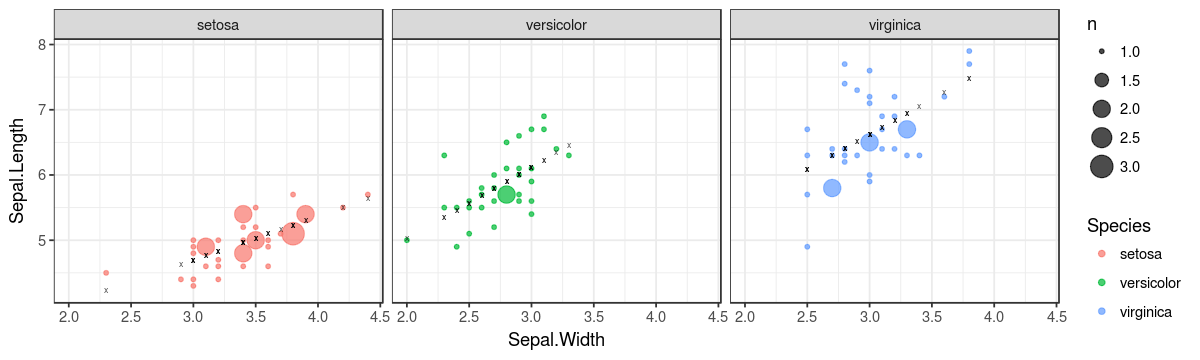

In [130]:
models %>% mutate(Sepal.Length.Pred = map(mod, predict)) -> y
y %>% print

z = y %>% select(-mod) %>% unnest()
z %>% head

options(repr.plot.width = 10, repr.plot.height = 3)

ggplot() +
geom_count(data=z, aes(x=Sepal.Width, y=Sepal.Length, colour = Species), alpha=0.7) +
geom_point(data=z, aes(x=Sepal.Width, y=Sepal.Length.Pred), alpha=0.7, color="black", shape='x') +
facet_wrap(~Species) +
theme_bw()

In [133]:
irisTest %>% 
nest(-Species) %>%
inner_join(models, by="Species")-> x

x %>% print

x %>% mutate(Sepal.Length.Pred = map2(mod, data, predict)) -> y
y %>% print

# A tibble: 3 x 4
     Species            data.x            data.y      mod
      <fctr>            <list>            <list>   <list>
1     setosa <tibble [13 x 4]> <tibble [37 x 4]> <S3: lm>
2 versicolor <tibble [17 x 4]> <tibble [33 x 4]> <S3: lm>
3  virginica <tibble [15 x 4]> <tibble [35 x 4]> <S3: lm>


ERROR: Error in mutate_impl(.data, dots): Evaluation error: `.y` is not a vector (closure).


Species,Sepal.Length.Pred,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
setosa,5.030220,5.1,3.5,1.4,0.2
setosa,4.963004,5.0,3.4,1.5,0.2
setosa,5.164654,5.4,3.7,1.5,0.2
setosa,4.694137,4.8,3.0,1.4,0.1
setosa,5.366304,5.8,4.0,1.2,0.2
setosa,5.030220,5.1,3.5,1.4,0.3


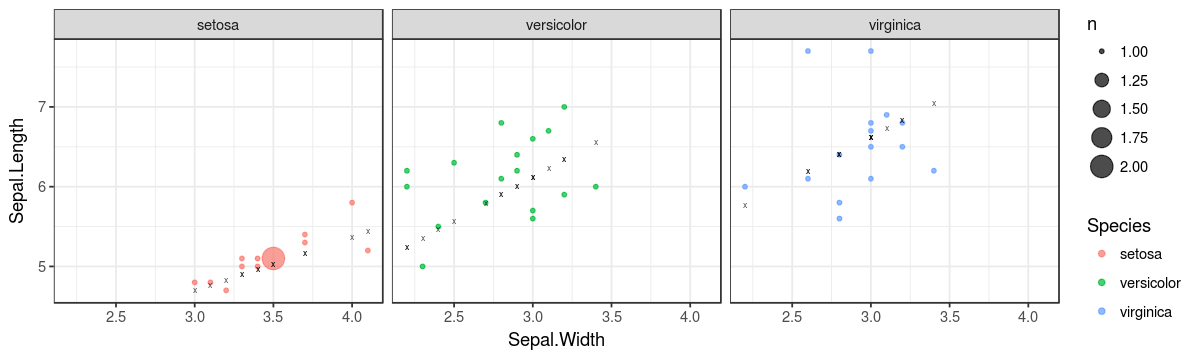

In [107]:
z = y %>% select(-mod) %>% unnest()
z %>% head

options(repr.plot.width = 10, repr.plot.height = 3)

ggplot() +
geom_count(data=z, aes(x=Sepal.Width, y=Sepal.Length, colour = Species), alpha=0.7) +
geom_point(data=z, aes(x=Sepal.Width, y=Sepal.Length.Pred), alpha=0.7, color="black", shape='x') +
facet_wrap(~Species) +
theme_bw()